<a href="https://colab.research.google.com/github/RohanDubeySF/Training/blob/master/Feature-Selection/corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pearson Corelation


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
db=load_diabetes()

In [ ]:
data=pd.DataFrame(db.data,columns=db.feature_names)
data['target']=db.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('target',axis=1),data['target'],test_size=0.2,random_state=69)
x_train.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
141,-0.027310,-0.044642,0.047685,-0.046985,0.034206,0.057245,-0.080217,0.130252,0.045067,0.131470
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096435,-0.034215
271,0.038076,0.050680,0.008883,0.042529,-0.042848,-0.021042,-0.039719,-0.002592,-0.018114,0.007207
263,-0.074533,0.050680,-0.077342,-0.046985,-0.046975,-0.032629,0.004460,-0.039493,-0.072133,-0.017646
382,0.048974,-0.044642,0.060618,-0.022885,-0.023584,-0.072712,-0.043401,-0.002592,0.104136,0.036201


In [ ]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.151915,0.152134,0.290797,0.245975,0.214359,-0.053397,0.183031,0.248585,0.284227
sex,0.151915,1.000000,0.055219,0.184778,-0.010209,0.085986,-0.357367,0.294576,0.139207,0.176558
bmi,0.152134,0.055219,1.000000,0.390882,0.239143,0.236727,-0.366056,0.415190,0.469667,0.387373
bp,0.290797,0.184778,0.390882,1.000000,0.170590,0.117067,-0.166653,0.214963,0.359619,0.386141
s1,0.245975,-0.010209,0.239143,0.170590,1.000000,0.899947,0.070266,0.551691,0.506415,0.321438
s2,0.214359,0.085986,0.236727,0.117067,0.899947,1.000000,-0.171806,0.666367,0.313318,0.284610
s3,-0.053397,-0.357367,-0.366056,-0.166653,0.070266,-0.171806,1.000000,-0.722499,-0.400337,-0.291267
s4,0.183031,0.294576,0.415190,0.214963,0.551691,0.666367,-0.722499,1.000000,0.618265,0.453559
s5,0.248585,0.139207,0.469667,0.359619,0.506415,0.313318,-0.400337,0.618265,1.000000,0.481954
s6,0.284227,0.176558,0.387373,0.386141,0.321438,0.284610,-0.291267,0.453559,0.481954,1.000000


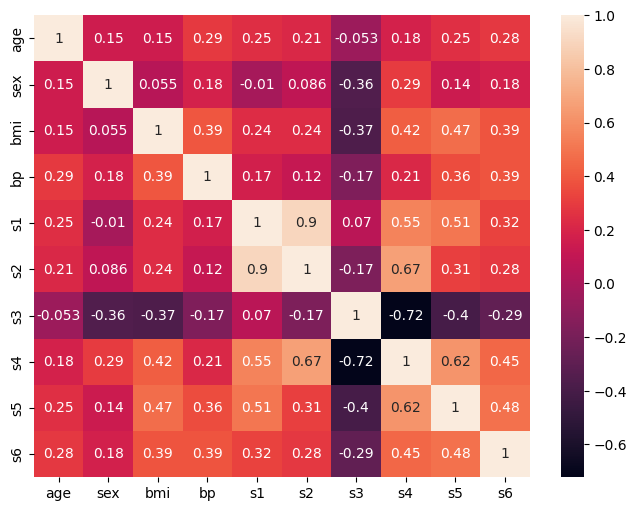

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [ ]:
def correlations(data):
  matrix=data.corr()
  cols=set()      # columns with correlation to be removed
  for i in range(len(matrix.columns)):
    for j in range(i):
      if abs(matrix.iloc[i,j])>0.8:
        cols.add(matrix.columns[i])
  return cols

In [ ]:
drop=correlations(x_train)
drop

{'s2'}

In [ ]:
x_train.drop(drop,axis=1,inplace=True)
x_test.drop(drop,axis=1,inplace=True)

In [ ]:
x_train.sample(5)

,age,sex,bmi,bp,s1,s3,s4,s5,s6
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.026550,-0.002592,0.040673,-0.009362
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.011824,-0.002592,-0.068332,-0.025930
144,0.030811,0.050680,0.046607,-0.015999,0.020446,-0.058127,0.071210,0.006207,0.007207
320,-0.023677,-0.044642,0.030440,-0.005670,0.082364,-0.017629,0.071210,0.033043,0.003064
403,-0.020045,-0.044642,0.097264,-0.005670,-0.005697,-0.021311,-0.002592,0.061684,0.040343
